In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [3]:
# Load data
data = pd.read_csv('/Users/jakubsuszwedyk/Documents/University/Year_2/Project/Project_VSC_2/Project2-2/Project_2-2/NL_data/ams.csv')

In [4]:
# Convert 'time' to datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

In [5]:
# Create 72 lagged features based on past temperature values
window_size = 72  # using last 72 hours as features
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Drop rows with NaN values due to shifting
data = data.dropna()

In [36]:
prediction_horizon = 24

In [37]:
# Predicting 24 hours into the future
data['t2m_future_24h'] = data['t2m'].shift(-prediction_horizon)
data = data.dropna() 

In [38]:
# Preparing the data
X = data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
y = data['t2m_future_24h']

In [39]:
# Splitting the data
train_size = int(len(X) * 0.6)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size
X_train, X_val, X_test = X.iloc[:train_size], X.iloc[train_size:train_size + val_size], X.iloc[-test_size:]
y_train, y_val, y_test = y.iloc[:train_size], y.iloc[train_size:train_size + val_size], y.iloc[-test_size:]


In [29]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Validate the model on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print('Validation Mean Squared Error:', val_mse)


Validation Mean Squared Error: 14.0045627933462


In [31]:
# Train the model on the combined training and validation sets for final testing
model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))


LinearRegression()

In [32]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print('Test Mean Squared Error:', test_mse)

Test Mean Squared Error: 12.11836147433509


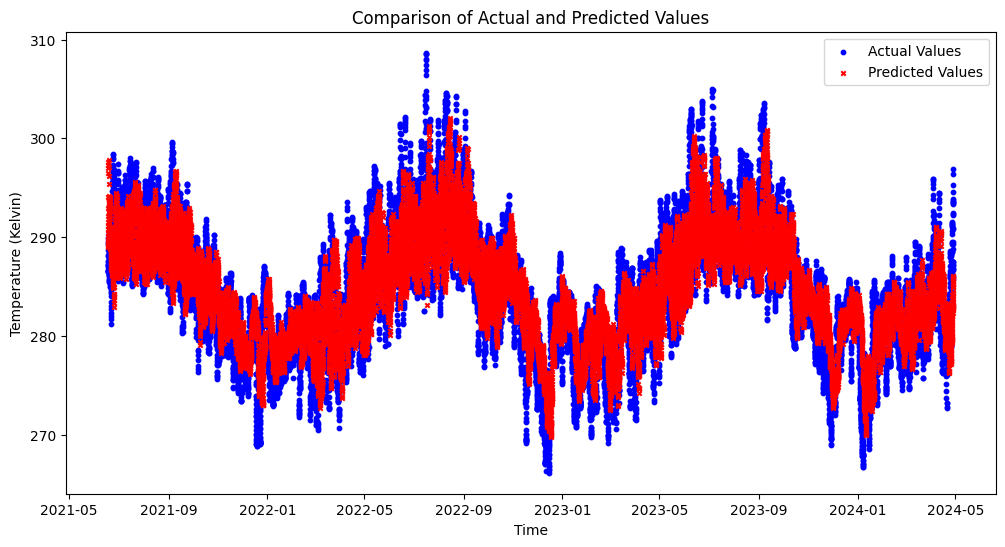

In [33]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values', marker='o', s=10)  # Actual values
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Values', marker='x', s=10)  # Predicted values
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

<p style="font-size:48px; font-weight:bold;">DON'T RE-RUN THE CELLS BELOW!!!</p>


<p style="font-size:24px; font-weight:bold;">Results for 24 hours forecast</p>


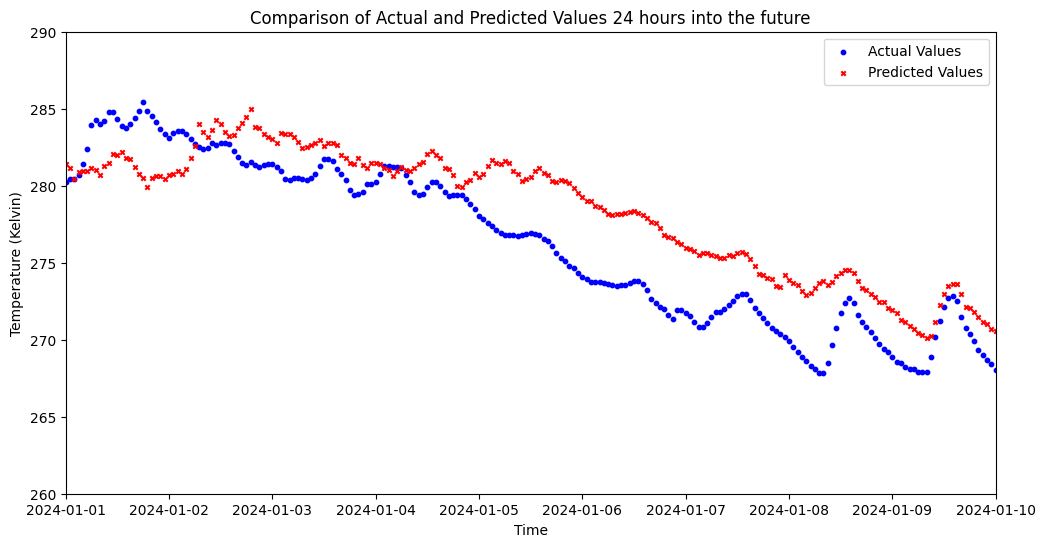

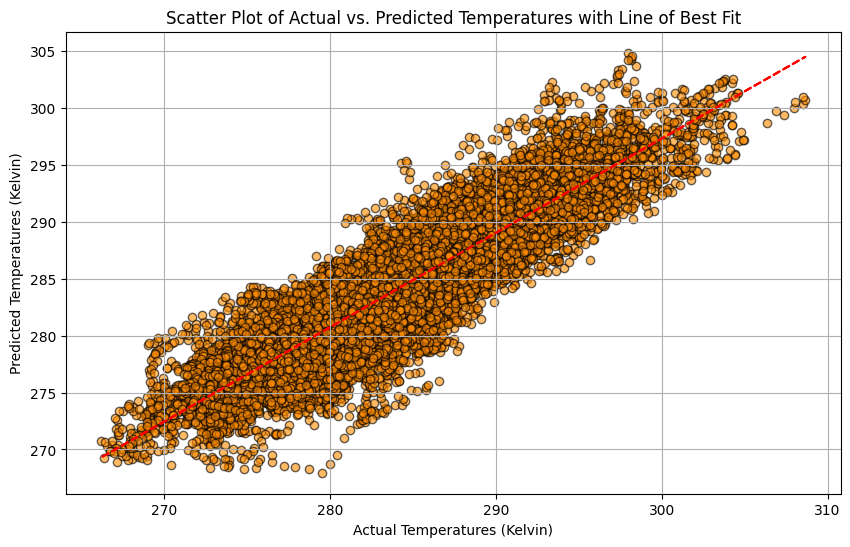

In [16]:
# Plotting Predicted vs Actual Values using points, zoomed in
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values', marker='o', s=10)  # using scatter for actual values
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Values', marker='x', s=10)  # using scatter for predicted values

# Set the time range to zoom in on
zoom_start = pd.Timestamp('2024-01-01')  # specify the start date
zoom_end = pd.Timestamp('2024-01-10')    # specify the end date
plt.xlim(zoom_start, zoom_end)  # Adjust the x-axis to display a specific time range

# Set the temperature range to zoom in on
min_temp = 260
max_temp = 290
plt.ylim(min_temp, max_temp)  # Adjust the y-axis to focus on this temperature range

plt.title('Comparison of Actual and Predicted Values 24 hours into the future')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

# Scatter plot with line of best fit for test set predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='darkorange', edgecolors='k', alpha=0.6)
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")  # Red dashed line
plt.title('Scatter Plot of Actual vs. Predicted Temperatures with Line of Best Fit')
plt.xlabel('Actual Temperatures (Kelvin)')
plt.ylabel('Predicted Temperatures (Kelvin)')
plt.grid(True)
plt.show()

<p style="font-size:24px; font-weight:bold;">Results for 48 hours forecast</p>


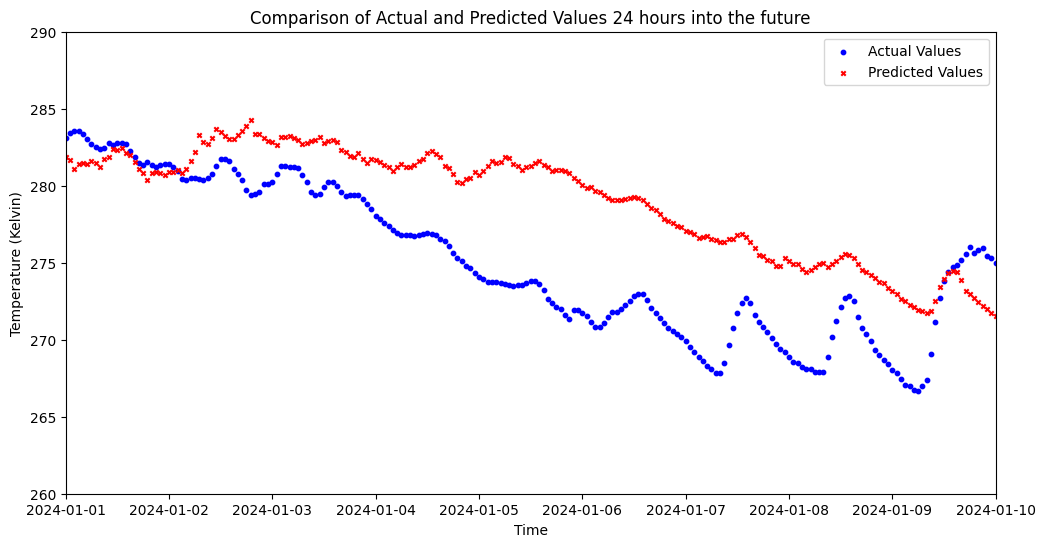

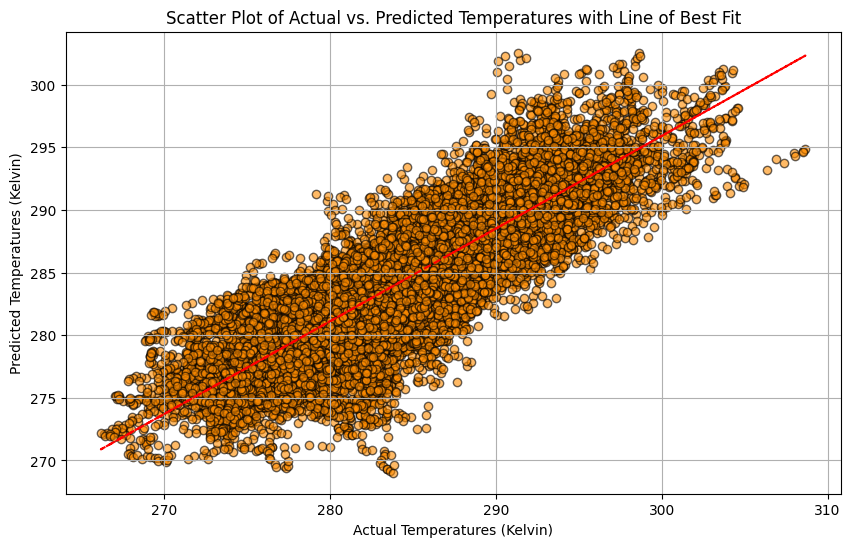

In [25]:
# Plotting Predicted vs Actual Values using points, zoomed in
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values', marker='o', s=10)  # using scatter for actual values
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Values', marker='x', s=10)  # using scatter for predicted values

# Set the time range to zoom in on
zoom_start = pd.Timestamp('2024-01-01')  # specify the start date
zoom_end = pd.Timestamp('2024-01-10')    # specify the end date
plt.xlim(zoom_start, zoom_end)  # Adjust the x-axis to display a specific time range

# Set the temperature range to zoom in on
min_temp = 260
max_temp = 290
plt.ylim(min_temp, max_temp)  # Adjust the y-axis to focus on this temperature range

plt.title('Comparison of Actual and Predicted Values 24 hours into the future')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

# Scatter plot with line of best fit for test set predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='darkorange', edgecolors='k', alpha=0.6)
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")  # Red dashed line
plt.title('Scatter Plot of Actual vs. Predicted Temperatures with Line of Best Fit')
plt.xlabel('Actual Temperatures (Kelvin)')
plt.ylabel('Predicted Temperatures (Kelvin)')
plt.grid(True)
plt.show()

<p style="font-size:24px; font-weight:bold;">Results for 72 hours forecast</p>


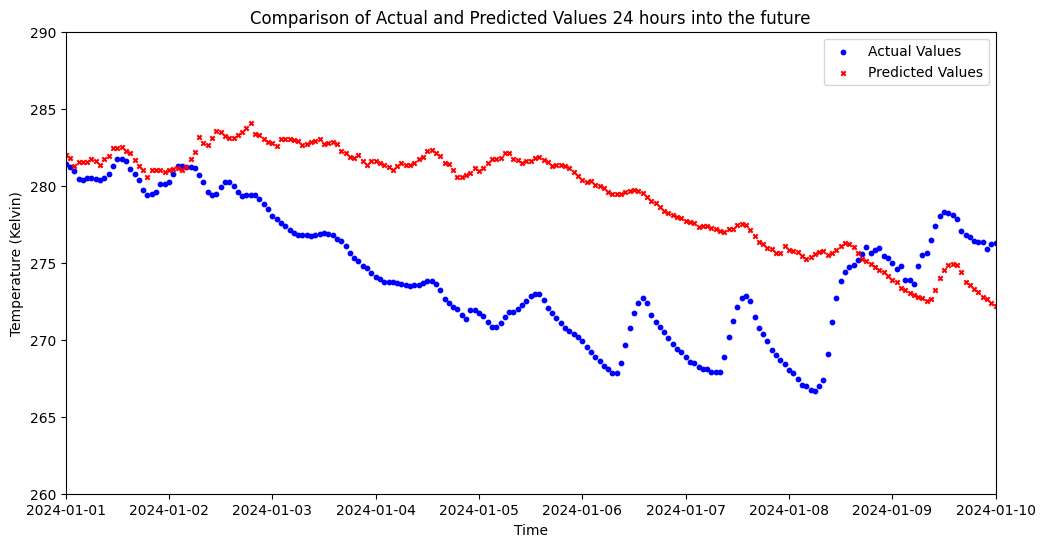

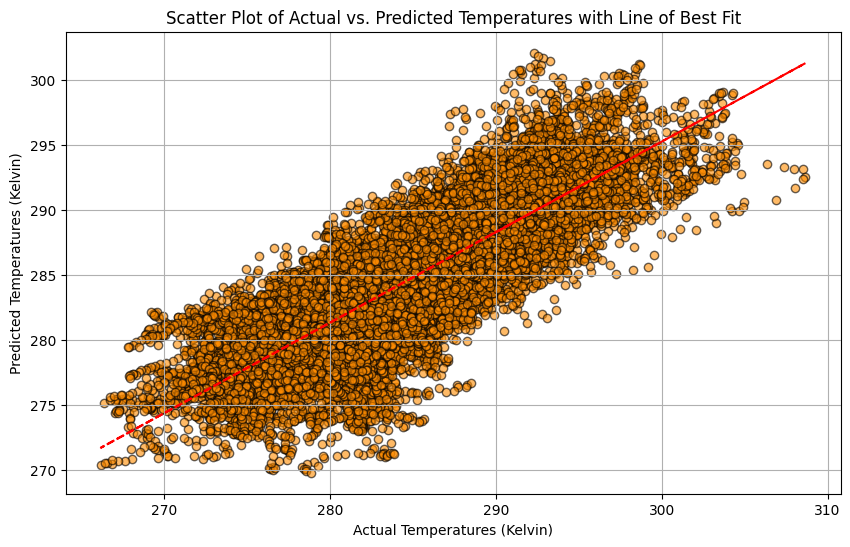

In [34]:
# Plotting Predicted vs Actual Values using points, zoomed in
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values', marker='o', s=10)  # using scatter for actual values
plt.scatter(y_test.index, y_test_pred, color='red', label='Predicted Values', marker='x', s=10)  # using scatter for predicted values

# Set the time range to zoom in on
zoom_start = pd.Timestamp('2024-01-01')  # specify the start date
zoom_end = pd.Timestamp('2024-01-10')    # specify the end date
plt.xlim(zoom_start, zoom_end)  # Adjust the x-axis to display a specific time range

# Set the temperature range to zoom in on
min_temp = 260
max_temp = 290
plt.ylim(min_temp, max_temp)  # Adjust the y-axis to focus on this temperature range

plt.title('Comparison of Actual and Predicted Values 24 hours into the future')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

# Scatter plot with line of best fit for test set predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='darkorange', edgecolors='k', alpha=0.6)
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")  # Red dashed line
plt.title('Scatter Plot of Actual vs. Predicted Temperatures with Line of Best Fit')
plt.xlabel('Actual Temperatures (Kelvin)')
plt.ylabel('Predicted Temperatures (Kelvin)')
plt.grid(True)
plt.show()

<p style="font-size:24px; font-weight:bold;">Comparison for different prediction horizons</p>


MSE for different forecast horizons:
1 hours ahead: MSE = 0.6135854246947081
2 hours ahead: MSE = 1.231333003345533
3 hours ahead: MSE = 1.923906493350066
4 hours ahead: MSE = 2.622210721474511
5 hours ahead: MSE = 3.2838510017580678
6 hours ahead: MSE = 3.889781577181625
7 hours ahead: MSE = 4.4298447404590915
8 hours ahead: MSE = 4.893536281192443
9 hours ahead: MSE = 5.278887595595087
10 hours ahead: MSE = 5.596474491849917
11 hours ahead: MSE = 5.848621623184853
12 hours ahead: MSE = 6.047659565600798
13 hours ahead: MSE = 6.206246437357815
14 hours ahead: MSE = 6.336323998041117
15 hours ahead: MSE = 6.446728405425392
16 hours ahead: MSE = 6.545694768358916
17 hours ahead: MSE = 6.637902706245368
18 hours ahead: MSE = 6.726110819315893
19 hours ahead: MSE = 6.8108566095344445
20 hours ahead: MSE = 6.893029694629867
21 hours ahead: MSE = 6.97993895020796
22 hours ahead: MSE = 7.074227670604334
23 hours ahead: MSE = 7.1993128492985665
24 hours ahead: MSE = 7.420548697491902
25 hours

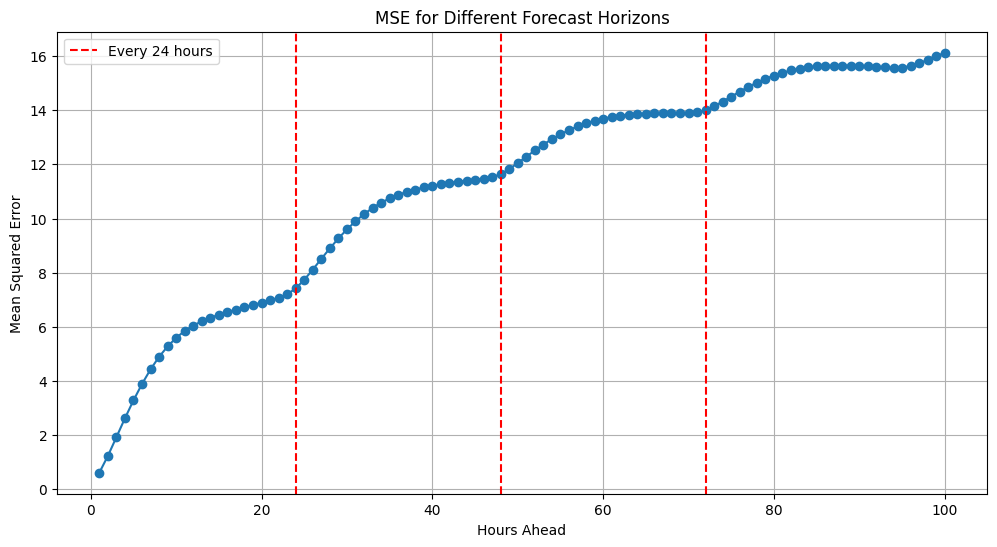

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_csv('/Users/jakubsuszwedyk/Documents/University/Year_2/Project/Project_VSC_2/Project2-2/Project_2-2/NL_data/ams.csv')

# Convert 'time' to datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Create 72 lagged features based on past temperature values
window_size = 72
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Dictionary to store MSE for each forecast horizon
mse_results = {}

# Loop over different forecast horizons from 1 hour to 72 hours
for hours_ahead in range(1, 101):
    # Shift the target variable according to the current forecast horizon
    data['target'] = data['t2m'].shift(-hours_ahead)
    
    # Drop rows with NaN values (mostly at the end due to the shift)
    temp_data = data.dropna()

    # Split data into features and target
    X = temp_data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
    y = temp_data['target']

    # Define training and validation set sizes
    train_size = int(len(X) * 0.6)
    val_size = int(len(X) * 0.2)
    X_train, X_val = X.iloc[:train_size], X.iloc[train_size:train_size + val_size]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:train_size + val_size]

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate the mean squared error on the validation set
    mse = mean_squared_error(y_val, y_val_pred)
    mse_results[hours_ahead] = mse

# Print and plot the results
print("MSE for different forecast horizons:")
for hours_ahead, mse in mse_results.items():
    print(f"{hours_ahead} hours ahead: MSE = {mse}")

# Plotting MSE results with vertical lines every 24 hours
plt.figure(figsize=(12, 6))
plt.plot(list(mse_results.keys()), list(mse_results.values()), marker='o', linestyle='-')
plt.xlabel('Hours Ahead')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Forecast Horizons')
for hour in range(24, 73, 24):
    plt.axvline(x=hour, color='red', linestyle='--', label='Every 24 hours' if hour == 24 else "")
plt.legend()
plt.grid(True)
plt.show()
